In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
seed=123

In [10]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [11]:
def run_experiment(m1, m2, m3, m4, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3), Bandit(m4)]

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(4)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.plot(np.ones(N)*m4) 
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

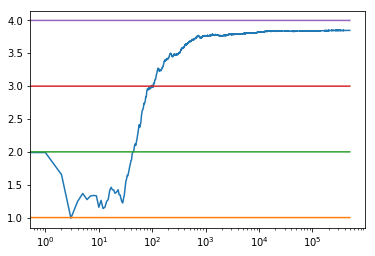

1.0127608053816848
1.9981062098560027
3.0044106374032356
3.9979319729990794


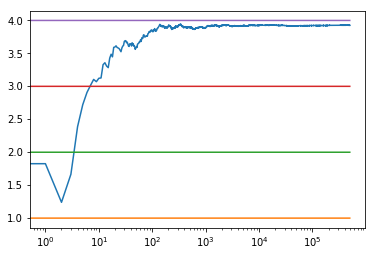

1.0121873024270467
2.003280520174994
3.003642674667903
4.000527160758239


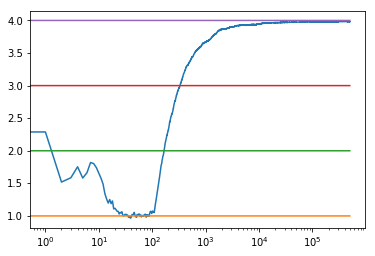

1.0194078952339733
1.9938593737677184
2.9596323714317463
3.998035835703543


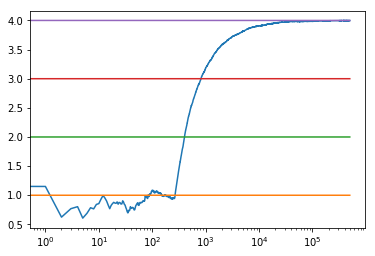

0.9923105733525951
2.0463324146828894
3.0029702212122467
4.000491293916552


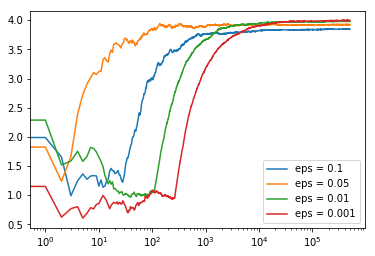

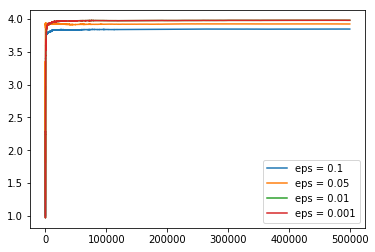

In [12]:
#experimenting with 4 bandits with eps 0.1, 0.05, 0.01 and 0.001

if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.1, 500000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.05, 500000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.01, 500000)
  c_001 = run_experiment(1.0, 2.0, 3.0, 4.0, 0.001, 500000)
    
  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_001, label='eps = 0.001')  
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.plot(c_01, label='eps = 0.001')  
  plt.legend()
  plt.show()


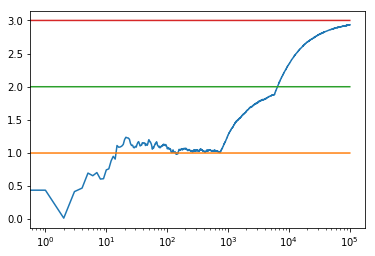

1.0134079327917738
2.00936822017695
2.9992516539321827


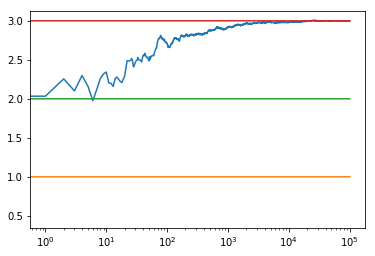

2.6315890381646434
2.84420116190089
2.998065262324896


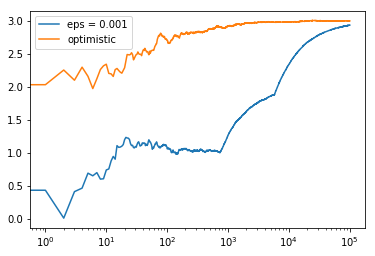

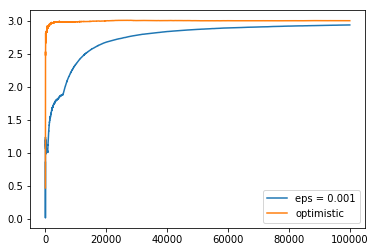

In [15]:
#optimistic/upper bound method

from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps


class Bandit:
  def __init__(self, m, upper_limit):
    self.m = m
    self.mean = upper_limit
    self.N = 1

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x


def run_experiment(m1, m2, m3, N, upper_limit=10):
  bandits = [Bandit(m1, upper_limit), Bandit(m2, upper_limit), Bandit(m3, upper_limit)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

if __name__ == '__main__':
  c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.001, 100000)
  oiv = run_experiment(1.0, 2.0, 3.0, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.001')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.001')
  plt.plot(oiv, label='optimistic')
  plt.legend()
  plt.show()